# Predicting cancer patients survival rate
 #### Author: Sharon Tan
 #### Project: University assignment - RMIT University

In this project, I created two classification machine learning models using the patient data set provided by Haberman (1976). My task is to pick the model that can most reliably predict if a patient will survive longer or less than 5 years after their surgery. The key purpose and potential use of this model is to help doctors filter out patients that may have a lower chance of survival and to prioritise care for them in order to maximise their chances of success post surgery.

Here are the attributes of the Haberman data set:

1. Age of patient at the time of operation (numerical)
2. Patient’s year of operation (numerical)
3. No. of positive axillary nodes detected (numerical)
4. The status of patients after the surgery (class)
- 1 = Survived 5 years or longer
- 2 = Died within 5 years

The two choices of classification models are: K-nearest-neighbour model and the Decision Tree Learning model. Each will be split into test and train set at the following ratio:

- 50% for training and 50% for testing;
- 60% for training and 40% for testing;
- 80% for training and 20% for testing;

Alright, let's begin!

## Task 1: Data Retrieving & Data pre-processing

In [124]:
# Data Retrieving

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Assign headers to columns
col_names = ["Age",
             "Year",
             "No_of_Nodes",
             "Status"
             ]

# Load the haberman.data file: 
df =  pd.read_csv("haberman.data", 
                          sep=',',header=None,names=col_names) 
print(df.head(20))


    Age  Year  No_of_Nodes  Status
0    30    64            1       1
1    30    62            3       1
2    30    65            0       1
3    31    59            2       1
4    31    65            4       1
5    33    58           10       1
6    33    60            0       1
7    34    59            0       2
8    34    66            9       2
9    34    58           30       1
10   34    60            1       1
11   34    61           10       1
12   34    67            7       1
13   34    60            0       1
14   35    64           13       1
15   35    63            0       1
16   36    60            1       1
17   36    69            0       1
18   37    60            0       1
19   37    63            0       1


### Check data types

In [125]:
# Checking that the data matches original source
display(df.shape)

# Checking data types of each column
display(df.dtypes)

(306, 4)

Age            int64
Year           int64
No_of_Nodes    int64
Status         int64
dtype: object

In [126]:
# There are 306 instances and 4 variables, all data types are integer which match the source data

In [127]:
# Assign 'Status' as a categorical data type

df['Status'] = pd.Categorical(df['Status'], 
               categories =[1,2])
print(df.Status.dtype)

category


### Check for typing errors or impossible values

In [128]:
# Check for typing or impossible values

print(set(df.Age))
print(set(df.Year))
print(set(df.No_of_Nodes))
print(set(df.Status))


{30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83}
{64, 65, 66, 67, 68, 69, 58, 59, 60, 61, 62, 63}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 30, 35, 46, 52}
{1, 2}


In [129]:
# Above shows that all values are within reasonable ranges, and no unusual values found

In [130]:
# Returning all the year in the data set

print(set(df.Year))

{64, 65, 66, 67, 68, 69, 58, 59, 60, 61, 62, 63}


### Converting the year format to 1900

In [131]:
# Converting the year format to 1900, by replacing the shortened year value to a full year


df['Year'].replace(58,1958,inplace = True)
df['Year'].replace(59,1959,inplace = True)
df['Year'].replace(60,1960,inplace = True)
df['Year'].replace(61,1961,inplace = True)
df['Year'].replace(62,1962,inplace = True)
df['Year'].replace(63,1963,inplace = True)
df['Year'].replace(64,1964,inplace = True)
df['Year'].replace(65,1965,inplace = True)
df['Year'].replace(66,1966,inplace = True)
df['Year'].replace(67,1967,inplace = True)
df['Year'].replace(68,1968,inplace = True)
df['Year'].replace(69,1969,inplace = True)


print(set(df.Year))

{1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969}


In [132]:
# Checking if conversion reflected in the data frame

print(df.Year.head(10))

0    1964
1    1962
2    1965
3    1959
4    1965
5    1958
6    1960
7    1959
8    1966
9    1958
Name: Year, dtype: int64


### Check for missing values

In [133]:
# Return any missing values
display(df.isnull().values.any())


False

In [134]:
# Above shows that there are no missing values in the data set

In [135]:
# Sense checking the data frame

print(df.head(20))

    Age  Year  No_of_Nodes Status
0    30  1964            1      1
1    30  1962            3      1
2    30  1965            0      1
3    31  1959            2      1
4    31  1965            4      1
5    33  1958           10      1
6    33  1960            0      1
7    34  1959            0      2
8    34  1966            9      2
9    34  1958           30      1
10   34  1960            1      1
11   34  1961           10      1
12   34  1967            7      1
13   34  1960            0      1
14   35  1964           13      1
15   35  1963            0      1
16   36  1960            1      1
17   36  1969            0      1
18   37  1960            0      1
19   37  1963            0      1


## Task 2: Data Exploration

### Explore each attribute

#### Plotting a histogram chart for Age

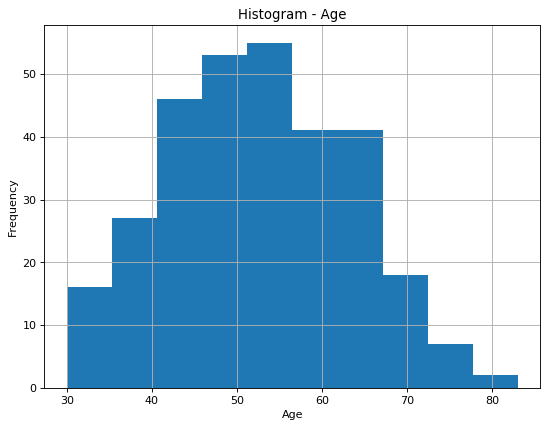

52.45751633986928
52.0
0    52
dtype: int64


In [136]:
# Plotting a histogram chart for Age

# Setting graph size
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# Setting histogram parameters
df['Age'].plot(kind='hist', bins = 10, title ='Histogram - Age')
plt.xlabel('Age')
plt.grid()
plt.show()

print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].mode())

In [137]:
# Looking at the shape of histogram above, the distribution of age is close to a normal distribution, which means the mean, 
# median and mode of Age in this data set is the same as shown in the output above

# We can see that most of the patients in this study is between 40 and 60

#### Explore Year with bar graph

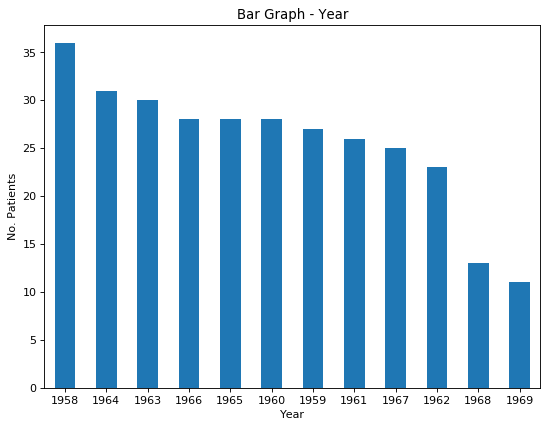

In [138]:
# Explore Year with bar graph



figure(figsize=(8, 6), dpi=80)

Year_bar = df.Year.value_counts().plot(y=[],kind='bar', title='Bar Graph - Year')
plt.ylabel('No. Patients')
plt.xlabel('Year')

# Rotate the x-labels to keep the text aligned horizontally
plt.xticks(rotation=0, horizontalalignment="center")



plt.show()

In [139]:
# Above bar graph shows that the 1958 had the highest record number of patients which was at the start of study
# and 1969 had the least which was also the year the study ended.

#### Explore No_of_Nodes using Boxplot

Text(0.5, 1.0, 'Boxplot - No_of_Nodes')

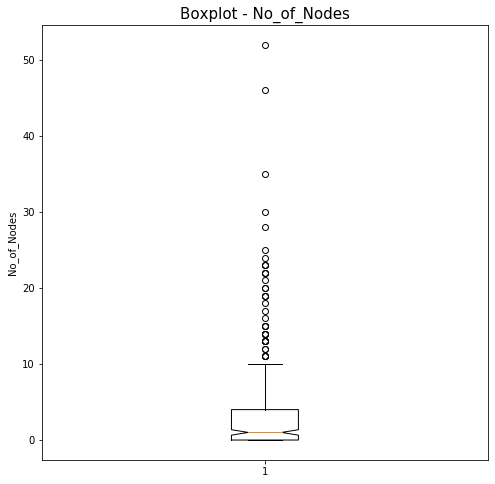

In [140]:
# Explore No_of_Nodes using Boxplot

# Import pacakages and functions
from pylab import *
import numpy as np

fig = figure(figsize=(8,8))  # define the figure window
ax  = fig.add_subplot(111)   # define the axis

ax.boxplot(df.No_of_Nodes,1)      

ax.set_ylabel('No_of_Nodes', fontsize=10) # Set ylabel
ax.set_title('Boxplot - No_of_Nodes', fontsize=15) # Set title
 




In [141]:
# Boxplot above shows that most patients in the study have between 0 to 6 positive axillary nodes detected, 
# and there are a hand full of patients who had more than 10, a few have between 30 and 50.

#### Explore Status using pie chart

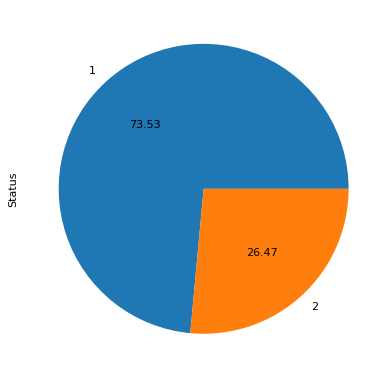

In [142]:
# Explore Status using pie chart

figure(figsize=(8, 6), dpi=80)


df.Status\
    .value_counts()\
    .plot(kind='pie',autopct='%.2f')
plt.show()

In [143]:
# Status of 1 being the patient survived 5 years or longer
# whereas Status of 2 means the patient died within 5 year

# According to the pie chart, 73% patients who undergone the surgery for breast cancer survived 5 years or longer

### Explore relationships between attributes
#### There will be 6 pairs of attributes

#### 1) Age and Year:

<Figure size 960x800 with 0 Axes>

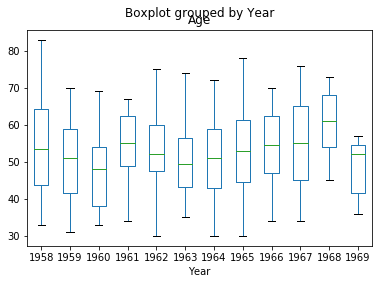

In [144]:
# Explore Age and Year

figure(figsize=(12,10), dpi=80)

df.dropna().boxplot(column='Age',by='Year',
                           grid=False)


plt.show()

In [145]:
# From the boxplot above, we can see that the mean age of patients who undergone surgery for breast cancer are around
# the same for each year, between 50 and 60. There is a noticeable pattern that the mean age since 1958 
# fluctuated every 2 years, but it increased for 5 consecutive years from 1963 until it dropped sharply in 1969.


#### 2) Age and No_of_Nodes:

<Figure size 640x480 with 0 Axes>

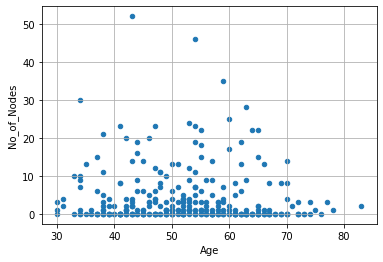

In [146]:
# Explore Age and No_of_Nodes

figure(figsize=(8,6), dpi=80)

df.plot(kind='scatter', 
          x='Age', y='No_of_Nodes')
          
plt.grid()
plt.show()

In [147]:
# The scatterplot above shows that there are no observable relationship between Age and the No_of_Nodes
# meaning age is not a good indicator of the number of nodes that a patient may have.

#### 3) Age & Status:

<Figure size 960x800 with 0 Axes>

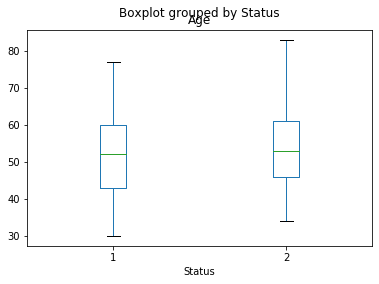

In [148]:
# Explore Age & Status

figure(figsize=(12,10), dpi=80)

df.dropna().boxplot(column='Age',by='Status',
                           grid=False)


plt.show()

In [149]:
# Above we see that the mean age for patients who lived 5 years or longer and those who survived less than 5 years are nearly identical.
# However the age range for patients who survived 5 years or longer is between 30 and 70+, whereas patients in status 2 are found to be between age 35 and 80+, 
# which means, overall, those who survived less than 5 years tend to be older than those who survived 5 years or more.


#### 4) Year and No_of_Nodes:

<Figure size 640x480 with 0 Axes>

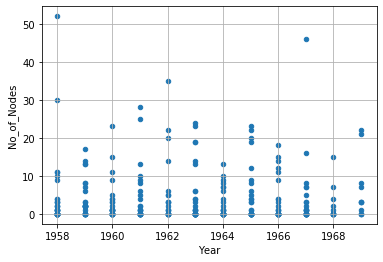

In [150]:
# Explore Year and No_of_Nodes

figure(figsize=(8,6), dpi=80)

df.plot(kind='scatter', 
          x='Year', y='No_of_Nodes')
          
plt.grid()
plt.show()

In [151]:
# Scatterplot shows that most patients are found with 1 to 10 no_of_nodes across the study period. Though there are 
# more patients with significant number of nodes (20 - 50) between 1958 and 1962 compared to the latter half of the study.

#### 5) Year and Status:

In [152]:
# To create a grouped bar graph, I first create a subset of data frame with just 'Year' and 'Status'

df_x = df[['Year', 'Status']]

print(df_x)

     Year Status
0    1964      1
1    1962      1
2    1965      1
3    1959      1
4    1965      1
..    ...    ...
301  1962      1
302  1967      1
303  1965      1
304  1965      2
305  1958      2

[306 rows x 2 columns]


     Year Status
0    1964      1
1    1962      1
2    1965      1
3    1959      1
4    1965      1
..    ...    ...
298  1968      1
300  1963      1
301  1962      1
302  1967      1
303  1965      1

[225 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


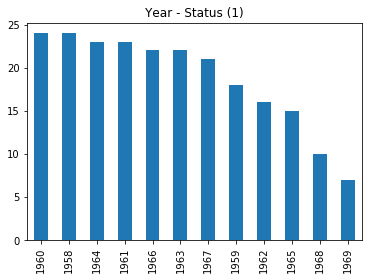

In [153]:
# Then, using the subset above, I create another subset but only include Status 1

df_x1 = df_x[df_x['Status']==1]
print(df_x1)

# Output bar graph
print(df_x1['Year'].value_counts().plot(kind='bar', title='Year - Status (1)'))

     Year Status
7    1959      2
8    1966      2
24   1969      2
34   1966      2
43   1960      2
..    ...    ...
286  1958      2
293  1963      2
299  1965      2
304  1965      2
305  1958      2

[81 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


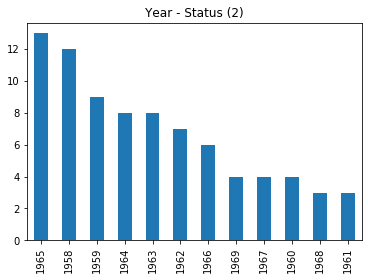

In [154]:
# I repeat the step above with Status == 2

df_x2 = df_x[df_x['Status']==2]
print(df_x2)

# Output bar graph

print(df_x2['Year'].value_counts().plot(y=[],kind='bar', title='Year - Status (2)'))

In [155]:
# I then create a new data frame that count the occurence of Status 1 by Year

status_1 = pd.DataFrame(data = df_x1['Year'].value_counts().reset_index().values,
            columns =["Year","Status 1"])
status_1

# Sort the new data frame by Year
status_1_byYear = status_1.sort_values('Year')
status_1_byYear


,Year,Status 1
1,1958,24
7,1959,18
0,1960,24
3,1961,23
8,1962,16
5,1963,22
2,1964,23
9,1965,15
4,1966,22
6,1967,21


In [156]:
# I repeat the same step above to count the occurence of Status 2 by Year

status_2 = pd.DataFrame(data = df_x2['Year'].value_counts().reset_index().values,
            columns =["Year","Status 2"])
status_2

# Sort the new data frame by Year
status_2_byYear = status_2.sort_values('Year')
status_2_byYear



,Year,Status 2
1,1958,12
2,1959,9
9,1960,4
11,1961,3
5,1962,7
4,1963,8
3,1964,8
0,1965,13
6,1966,6
8,1967,4


In [157]:
# I then join both new data frames using 'outer' join type to keep all data based on Year

join = pd.merge(status_1_byYear,status_2_byYear,on='Year',how='outer')

# Output 

print(join)

    Year  Status 1  Status 2
0   1958        24        12
1   1959        18         9
2   1960        24         4
3   1961        23         3
4   1962        16         7
5   1963        22         8
6   1964        23         8
7   1965        15        13
8   1966        22         6
9   1967        21         4
10  1968        10         3
11  1969         7         4


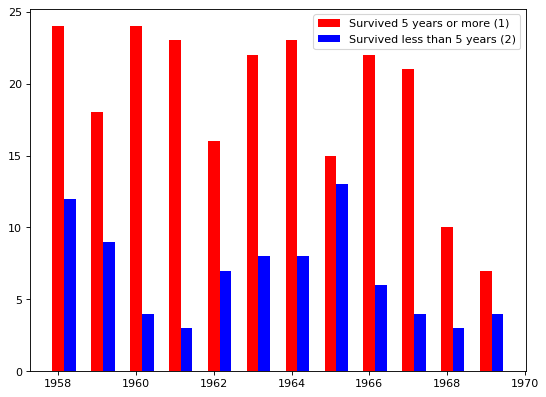

In [158]:
# Setting up variables

y1=join['Status 1']
y2=join['Status 2']
x= join['Year']


# Setting figure sizes

figure(figsize=(8, 6), dpi=80)


# Plotting bar charts, setting bar widths, colours and labels
plt.bar(x+0,y1,color ='r',width=.3,label ="Survived 5 years or more (1)")
plt.bar(x+.3,y2,color='b',width = .3,label ="Survived less than 5 years (2)")

# Show legend and bar chart
plt.legend()
plt.show()

In [159]:
# Looking at the grouped bar chart above, we can see that every year 
# there are significantly more patients who undergone the operation and survived 5 years or more than patients who survived less than 5 years.
# Except for in 1965, the ratio between status 1 and status 2 patients was close to 1, the highest out of all the years
# showing that 1965 had the least successful operation compared to other years.

#### 6) No_of_Nodes and Status

<Figure size 960x800 with 0 Axes>

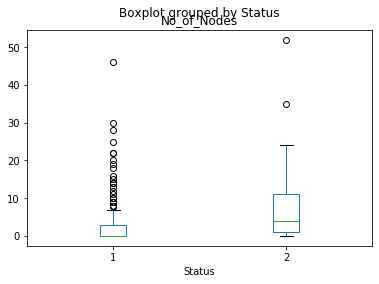

<Figure size 960x800 with 0 Axes>

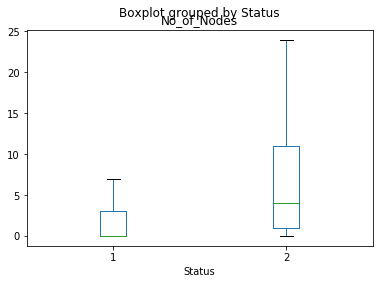

In [160]:
# Explore No_of_Nodes & Status (with outliers)

figure(figsize=(12,10), dpi=80)

df.dropna().boxplot(column='No_of_Nodes',by='Status',
                           grid=False)


plt.show()


# Explore No_of_Nodes & Status (without outliers)

figure(figsize=(12,10), dpi=80)

df.dropna().boxplot(column='No_of_Nodes',by='Status',
                           grid=False,showfliers=False)


plt.show()

In [161]:
# Looking at two boxplots above, first with outliers and the second without outliers.
# We can see that patients who survived 5 years or longer, tend to have less than 10 positive axillary nodes detected, with some had no nodes at all,
# whereas patients who survived less than 5 years had at least 1 positive node, and can range up to 20+ nodes.
# However, there are many outliers detected among patients who survived longer than 5 years despite having 
# lower average number of positive nodes. This means statiscally having a low number of nodes
# may indicate a higher chance of surviving 5 years or more post operation, it does not seem to be a deciding factor.

## Task 3: Data Modelling

### A classification task

### First Model: KNN Model

In [162]:
# For this assignment, I will be using the classification data modelling method 

#### Load Packages

In [163]:
# Load packages

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pylab as plt

#### Select target variable

In [164]:
# Choosing target variable
# Since the survival status is of class attribute and contains only 2 integers, i.e. 1 and 2, it is the correct target variable
# It is also the outcome that is dependent on other variables.


y = df['Status']

#### Select features

In [165]:
# Choosing features for the model, I use all attributes

df_features = df[['Age','Year','No_of_Nodes']]
df_features

,Age,Year,No_of_Nodes
0,30,1964,1
1,30,1962,3
2,30,1965,0
3,31,1959,2
4,31,1965,4
...,...,...,...
301,75,1962,1
302,76,1967,0
303,77,1965,3
304,78,1965,1


#### Split to test set and train set 

### i) 50% split

In [166]:
# 50% split
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    y,
                                                    test_size=0.50,
                                                    random_state=0)

# Checking train size
print(f'Training dataset size:{X_train.shape[0]}')
# Checking test size
print(f'Testing dataset size:{X_test.shape[0]}')

# They should each contain 153 rows

Training dataset size:153
Testing dataset size:153


#### Select a k-Nearest Neighbor classifier

In [167]:
# Choosing K
# Using the general practice of finding k by computing sqrt(n), with n = no. training set. 
# According to above, the current training set is 153.

print("K by sqrt(n) is")
a = sqrt(153)
print(a)

K by sqrt(n) is
12.36931687685298


In [168]:
# Output above shows that the square root of the training set is 12.36, 
# but to avoid confusion between two classes of data,
# and to make the model more robust to outliers, I'll use an odd number of 13.

In [169]:
# Setting K
clf = KNeighborsClassifier(13)

#### Fit the data

In [170]:
# Fit the classifier into the train data set
fit  = clf.fit(X_train,y_train)

#### Predict Unseen data

In [171]:
# Run prediction
predicted = fit.predict(X_test)

#### Create confusion matrix

In [172]:
# Check confusion matrix of the predcited results with test data set
confusion_matrix(y_test,predicted)

array([[96,  6],
       [42,  9]], dtype=int64)

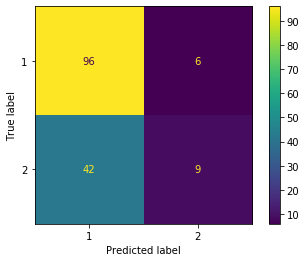

In [173]:
# Import libraries for visualisation

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

In [174]:
# Based on the confusion matrix above, the model correctly predicted 105 observations, 96 TP and 9 TN,
# and made 48 prediction errors.

#### Checking error rate

In [175]:
# Checking for Error rate 


error_rate = 48/153
print("Error rate")
error_rate

Error rate


0.3137254901960784

In [176]:
# The model consist of 31% error rate, which means, 69% of the time the model will make a correct prediction.

#### Classification report

In [177]:
# Import library
import sklearn.metrics
from sklearn.metrics import classification_report

print ("Accuracy on training set:")
print (clf.score(X_train, y_train))
    
print ("Accuracy on testing set:")
print (clf.score(X_test, y_test))
    
    
print ("Classification Report:")
print (classification_report(y_test, predicted))
    
print ("Confusion Matrix:")
print (confusion_matrix(y_test, predicted))

Accuracy on training set:
0.8104575163398693
Accuracy on testing set:
0.6862745098039216
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.94      0.80       102
           2       0.60      0.18      0.27        51

    accuracy                           0.69       153
   macro avg       0.65      0.56      0.54       153
weighted avg       0.66      0.69      0.62       153

Confusion Matrix:
[[96  6]
 [42  9]]


In [178]:
# A full report on the train set, with key metrics including its precision, recall, f1-score, and test accuracy.
# This model has a 69% test accuracy.

In [179]:
#### Checking for possible K values

Text(0, 0.5, 'Error Rate')

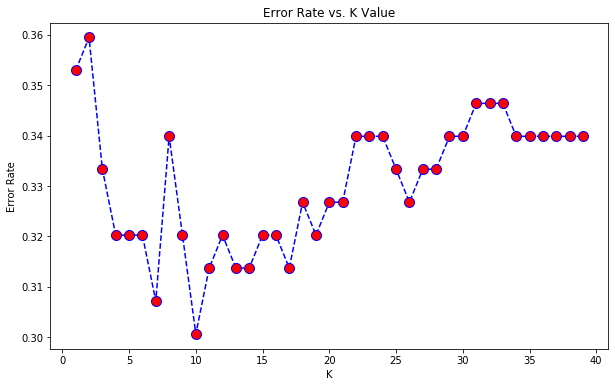

In [180]:
# Checking K value between 1 and 40

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    # Visualising error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [181]:
# Looking at the error rate graph above, k value of 10 achieves the lowest error rate. I proceed to input k=10 into the model.

#### Comparing performance

In [182]:
# Using K value of 10 in the model

clf2 = KNeighborsClassifier(10)
fit  = clf2.fit(X_train,y_train)
predicted2 = fit.predict(X_test)


# Comparing results
print ("Classification Report (K-value = 10):")
print (classification_report(y_test, predicted2))
print ("Confusion Matrix:")
print (confusion_matrix(y_test, predicted2))

print("Compare with K = 13")
print ("Classification Report:")
print (classification_report(y_test, predicted))
print ("Confusion Matrix:")
print (confusion_matrix(y_test, predicted))


Classification Report (K-value = 10):
              precision    recall  f1-score   support

           1       0.70      0.96      0.81       102
           2       0.69      0.18      0.28        51

    accuracy                           0.70       153
   macro avg       0.70      0.57      0.55       153
weighted avg       0.70      0.70      0.63       153

Confusion Matrix:
[[98  4]
 [42  9]]
Compare with K = 13
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.94      0.80       102
           2       0.60      0.18      0.27        51

    accuracy                           0.69       153
   macro avg       0.65      0.56      0.54       153
weighted avg       0.66      0.69      0.62       153

Confusion Matrix:
[[96  6]
 [42  9]]


#### Result: Looking at both reports above, the first model with k=10, the second one k=13. It shows that the model with k value 10 is slightly better tuned than one with the k value of 13; with a test accuracy of 0.70, its F1 score's weighted average is also slightly higher at 0.63 compared to the (k=13) model which has 0.62.

### ii) 60% split

In [183]:
# Split test and train sets

X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    y,
                                                    test_size=0.40,
                                                    random_state=0)

#Check sizes

print(f'Training dataset size:{X_train.shape[0]}')
print(f'Testing dataset size:{X_test.shape[0]}')

Training dataset size:183
Testing dataset size:123


In [184]:
# Choose K value

print("k-value")
b = sqrt(183)
print(b)


k-value
13.527749258468683


In [185]:
# Select the k-Nearest Neighbor classifier
clf = KNeighborsClassifier(13)

# Fit the data
fit  = clf.fit(X_train,y_train)

# Predict unseen data
predicted = fit.predict(X_test)

#### Confusion Matrix

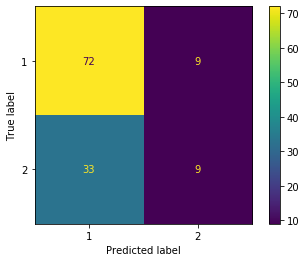

In [186]:
# Visualise confusion matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

#### Checking for Error rate 

In [187]:
# Checking for Error rate 

error_rate = 42/123
print("Error rate")
print(error_rate)

Error rate
0.34146341463414637


#### Classification report

In [188]:
print ("Classification Report:")
print (classification_report(y_test, predicted))

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.89      0.77        81
           2       0.50      0.21      0.30        42

    accuracy                           0.66       123
   macro avg       0.59      0.55      0.54       123
weighted avg       0.62      0.66      0.61       123



#### Checking K value between 1 and 40

Text(0, 0.5, 'Error Rate')

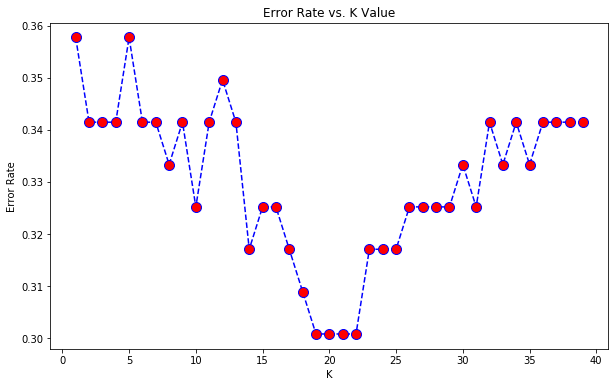

In [189]:
# Checking K value between 1 and 40

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    # Visualising error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [190]:
# The error rate graph above shows that a K value between 19 and 22 improve the error rate, to make the model more robust to outliers,
# I'll input the k-value of 22 into the model.

#### Using K value of 22

In [191]:
# Using K value of 22
clf3 = KNeighborsClassifier(22)

# Fit the data
fit3  = clf3.fit(X_train,y_train)

# Predict unseen data
predicted3 = fit3.predict(X_test)

#### Comparing performance

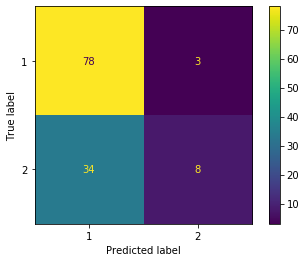

Classification Report (K value =22):
              precision    recall  f1-score   support

           1       0.70      0.96      0.81        81
           2       0.73      0.19      0.30        42

    accuracy                           0.70       123
   macro avg       0.71      0.58      0.56       123
weighted avg       0.71      0.70      0.64       123

Compare with k value = 13
Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.89      0.77        81
           2       0.50      0.21      0.30        42

    accuracy                           0.66       123
   macro avg       0.59      0.55      0.54       123
weighted avg       0.62      0.66      0.61       123



In [192]:
# Check confusion matrix using K-value of 22
plot_confusion_matrix(clf3, X_test, y_test)  
plt.show()  

print ("Classification Report (K value =22):")
print (classification_report(y_test, predicted3))
print("Compare with k value = 13")
print ("Classification Report:")
print (classification_report(y_test, predicted))

#### Results: Above shows that, when using a K-value of 22, the test accuracy of the model improves, from 0.66 to 0.70 and the weighted avg f1-score increases from 0.61 to 0.64.

#### iii) 80% split

In [193]:
# Setting train (80%) and test sets (20%)

X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)


print(f'Training dataset size:{X_train.shape[0]}')
print(f'Testing dataset size:{X_test.shape[0]}')


Training dataset size:244
Testing dataset size:62


In [194]:
# Choose K value
print("k-value")
c = sqrt(244)
print(c)

k-value
15.620499351813308


In [195]:
# Will use 15 as the classifier

In [196]:
# Select the k-Nearest Neighbor classifier
clf = KNeighborsClassifier(15)

# Fit the data
fit  = clf.fit(X_train,y_train)

# Predict unseen data
predicted = fit.predict(X_test)

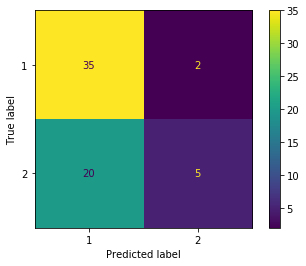

In [197]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

In [198]:
print ("Classification Report:")
print (classification_report(y_test, predicted))

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.95      0.76        37
           2       0.71      0.20      0.31        25

    accuracy                           0.65        62
   macro avg       0.68      0.57      0.54        62
weighted avg       0.67      0.65      0.58        62



Text(0, 0.5, 'Error Rate')

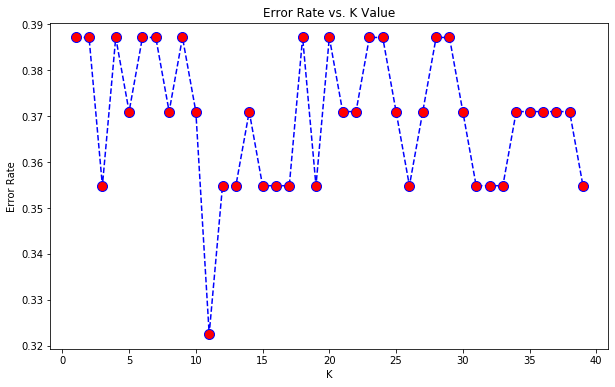

In [199]:
# Checking K value between 1 and 40

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
# Visualising error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [200]:
# Above shows that K - value of 11 provides the lowest error rate

#### Comparing performance

In [201]:
# Using K value of 11
clf4 = KNeighborsClassifier(11)

# Fit the data
fit4  = clf4.fit(X_train,y_train)

# Predict unseen data
predicted4 = fit4.predict(X_test)

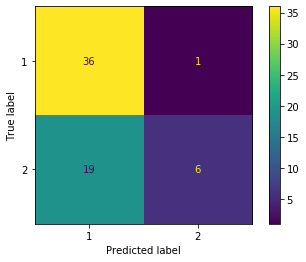

Classification Report(K-value =11):
              precision    recall  f1-score   support

           1       0.65      0.97      0.78        37
           2       0.86      0.24      0.38        25

    accuracy                           0.68        62
   macro avg       0.76      0.61      0.58        62
weighted avg       0.74      0.68      0.62        62

Compare with k value = 15
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.95      0.76        37
           2       0.71      0.20      0.31        25

    accuracy                           0.65        62
   macro avg       0.68      0.57      0.54        62
weighted avg       0.67      0.65      0.58        62



In [202]:
plot_confusion_matrix(clf4, X_test, y_test)  
plt.show()  

print ("Classification Report(K-value =11):")
print (classification_report(y_test, predicted4))
print("Compare with k value = 15")
print ("Classification Report:")
print (classification_report(y_test, predicted))

#### Result:  Above report shows that a K-value of 11 improves the model rather than 15, with test accuracy of 0.68 and a weighted avg  f-core of 0.62.

### Summary

####  The preferred K-value for:
#### - 50% split is 10, with test accuracy = 0.70; weighted avg f1-score = 0.63
####  - 60% split = 22; test accuracy = 0.70; weighted avg f1-score = 0.64
####  - 80% split = 11; test accuracy = 0.68; weighted avg f1-score = 0.62
#### K value of 10 and 22 both achieve the same accuracy, however model with k=22 has a better weighted avg f-score, hence the model with a k-value of 22 performed the best in this exercise. 

### Second Model: Decision Tree Model

#### Load packages

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


#### Setting target variable and features

In [204]:
# Target variable
y = df.Status

# Features
df_features = df[['Age','Year','No_of_Nodes']]
df_features_names = ['Age','Year','No_of_Nodes']



### i) 50% split

#### Spitting train and test set

In [205]:
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    y,
                                                    test_size=0.5,
                                                    random_state=0)

#Check sizes

print(f'Training dataset size:{X_train.shape[0]}')
print(f'Testing dataset size:{X_test.shape[0]}')

Training dataset size:153
Testing dataset size:153


#### Select decision tree classifier

In [206]:
# Starting with common practice of depth of 3
clf = DecisionTreeClassifier(max_depth=3)

#### Data Modelling

In [207]:
# Training model using fit
model = clf.fit(X_train, y_train)

# Predict value
y_pre= model.predict(X_test)
print(f"the size of y_pre is: {y_pre.shape}")

the size of y_pre is: (153,)


#### Confusion Matrix

In [208]:
cm = confusion_matrix(y_test, y_pre)
print(f"the confusion matrix is :\n\
{cm}")

the confusion matrix is :
[[91 11]
 [44  7]]


#### Classification report

In [209]:
print("Classification Report: Decision Tree Model")
print(classification_report(y_test, y_pre))

Classification Report: Decision Tree Model
              precision    recall  f1-score   support

           1       0.67      0.89      0.77       102
           2       0.39      0.14      0.20        51

    accuracy                           0.64       153
   macro avg       0.53      0.51      0.49       153
weighted avg       0.58      0.64      0.58       153



#### Visualise

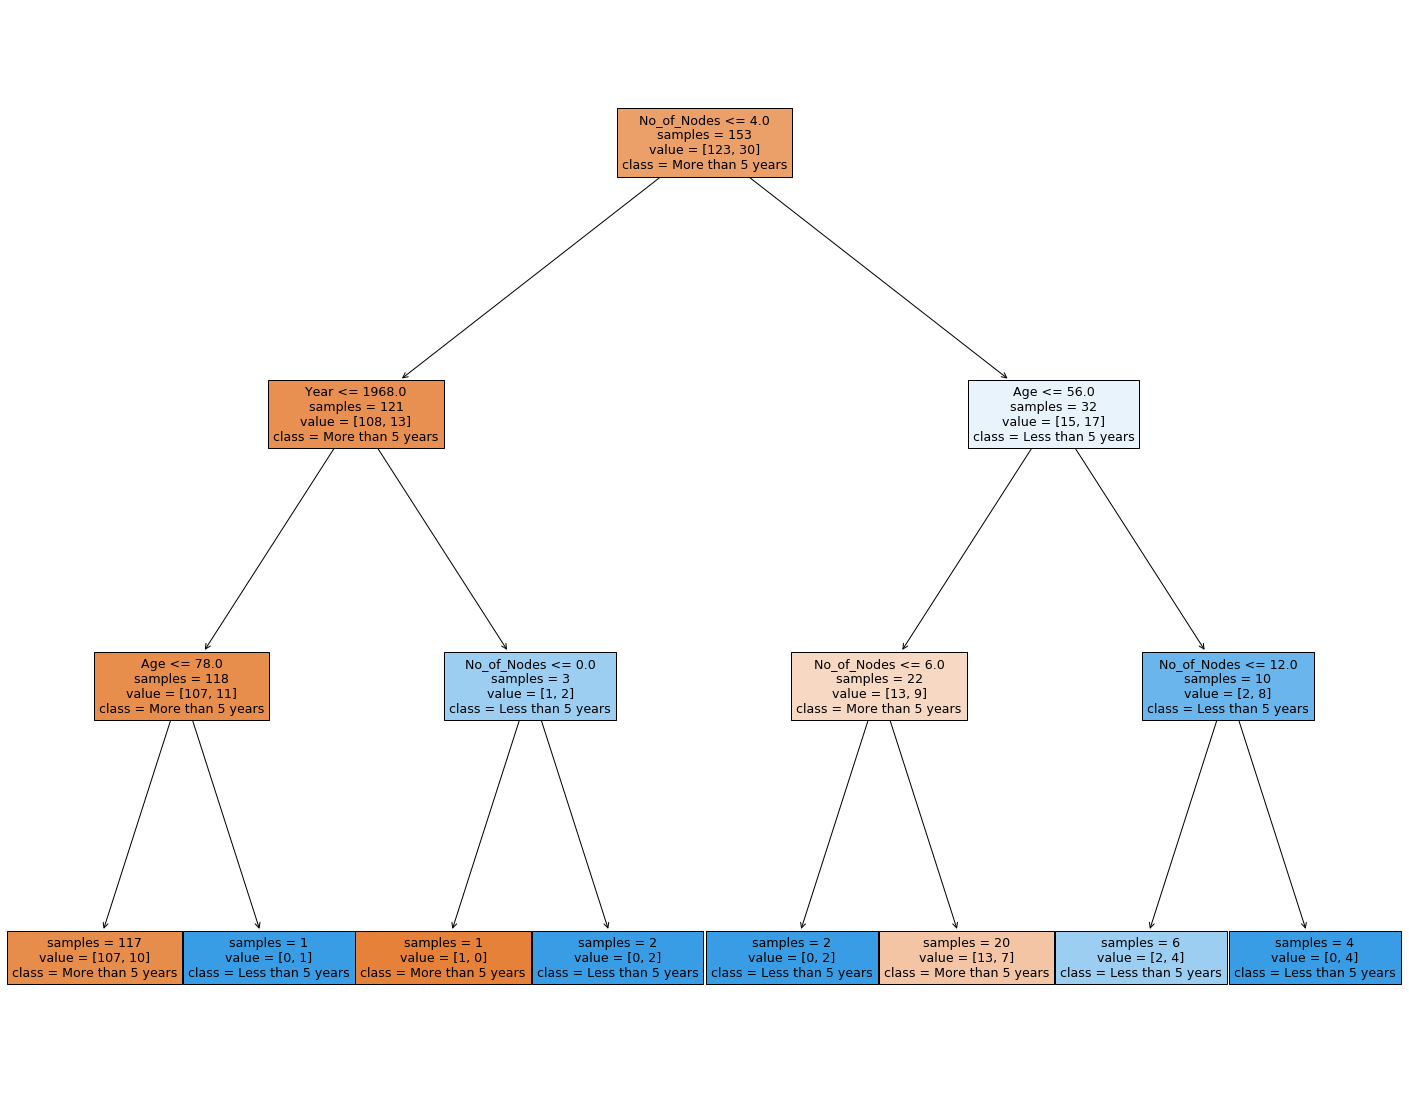

In [210]:
# Setting target names
target_names = ["More than 5 years","Less than 5 years"]

# Visualise with max_depth of 3
fig = plt.figure(figsize=(25,20))
_= sklearn.tree.plot_tree(clf, precision=0, impurity=False,
                   feature_names=df_features_names,  
                   class_names=target_names,
                   filled=True)

#### Save tree to png file

In [211]:
fig.savefig("decistion_tree_50%.png")

#### Checking for error rate against max_depth

Text(0, 0.5, 'Error Rate')

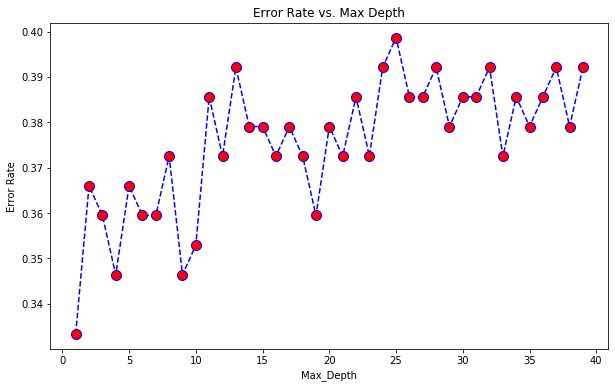

In [212]:
# Checking max_dept between 1 and 40

error_rate = []

for i in range(1,40):
    
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train,y_train)
    pred_i = tree_clf .predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    # Visualising error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Max Depth')
plt.xlabel('Max_Depth')
plt.ylabel('Error Rate')

##### The error and max_depth line chart above shows that a max_depth of 1 has the lowest error rate

#### Comparing performance

In [213]:
# Using max_depth of 1
clf5 = DecisionTreeClassifier(max_depth=1)

# Training model using fit
model = clf5.fit(X_train, y_train)

# Predict value
y_pre5= model.predict(X_test)
print(f"the size of y_pre5 is: {y_pre5.shape}")



the size of y_pre5 is: (153,)


#### Confusion Matrix

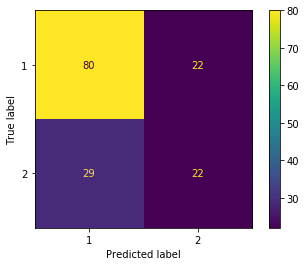

the confusion matrix is :
[[80 22]
 [29 22]]


In [214]:
plot_confusion_matrix(clf5, X_test, y_test)  
plt.show()  
cm = confusion_matrix(y_test, y_pre5)
print(f"the confusion matrix is :\n\
{cm}")

#### Classification report

In [215]:
print("Classification Report: Decision Tree Model (max_depth = 1")
print(classification_report(y_test, y_pre5))
print("Compare with max_depth = 3")
print ("Classification Report:")
print (classification_report(y_test, y_pre))

Classification Report: Decision Tree Model (max_depth = 1
              precision    recall  f1-score   support

           1       0.73      0.78      0.76       102
           2       0.50      0.43      0.46        51

    accuracy                           0.67       153
   macro avg       0.62      0.61      0.61       153
weighted avg       0.66      0.67      0.66       153

Compare with max_depth = 3
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.89      0.77       102
           2       0.39      0.14      0.20        51

    accuracy                           0.64       153
   macro avg       0.53      0.51      0.49       153
weighted avg       0.58      0.64      0.58       153



#### Result: Above comparison shows that max_depth of 1 achieves higher test accuracy than max_depth of 3; accuracy = 0.67 and weighted avg  f1-score = 0.66.

#### Visualise 

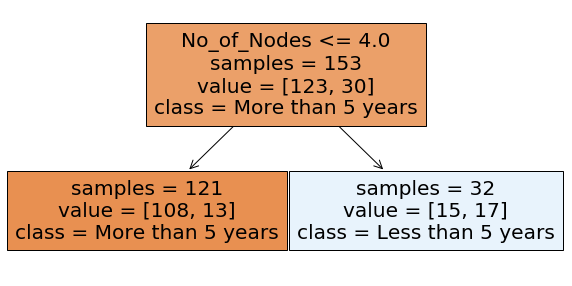

In [216]:
# Setting target names
target_names = ["More than 5 years","Less than 5 years"]
df_features_names = ['Age','Year','No_of_Nodes']


# Visualise with max_depth of 1
fig = plt.figure(figsize=(10,5))
_= sklearn.tree.plot_tree(clf5, precision=0, impurity=False,
                   feature_names=df_features_names,  
                   class_names=target_names,
                   filled=True)

#### Save visualisation to png file

In [217]:
fig.savefig("decistion_tree_50%_2.png")

### ii) 60% split

#### Spliting train and test set

In [218]:
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=0)

#Check sizes

print(f'Training dataset size:{X_train.shape[0]}')
print(f'Testing dataset size:{X_test.shape[0]}')

Training dataset size:183
Testing dataset size:123


#### Select decision tree classifier

In [219]:

# Starting with common practice of depth of 3
clf = DecisionTreeClassifier(max_depth=3)

#### Data Modelling

In [220]:
# Training model using fit
model = clf.fit(X_train, y_train)

# Predict value
y_pre= model.predict(X_test)
print(f"the size of y_pre is: {y_pre.shape}")

the size of y_pre is: (123,)


#### Confusion Matrix

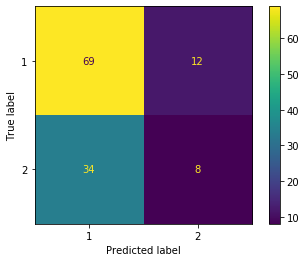

the confusion matrix is :
[[69 12]
 [34  8]]


In [221]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  


cm = confusion_matrix(y_test, y_pre)
print(f"the confusion matrix is :\n\
{cm}")

#### Classification report

In [222]:

print("Classification Report: Decision Tree Model")
print(classification_report(y_test, y_pre))


Classification Report: Decision Tree Model
              precision    recall  f1-score   support

           1       0.67      0.85      0.75        81
           2       0.40      0.19      0.26        42

    accuracy                           0.63       123
   macro avg       0.53      0.52      0.50       123
weighted avg       0.58      0.63      0.58       123



#### Visualise

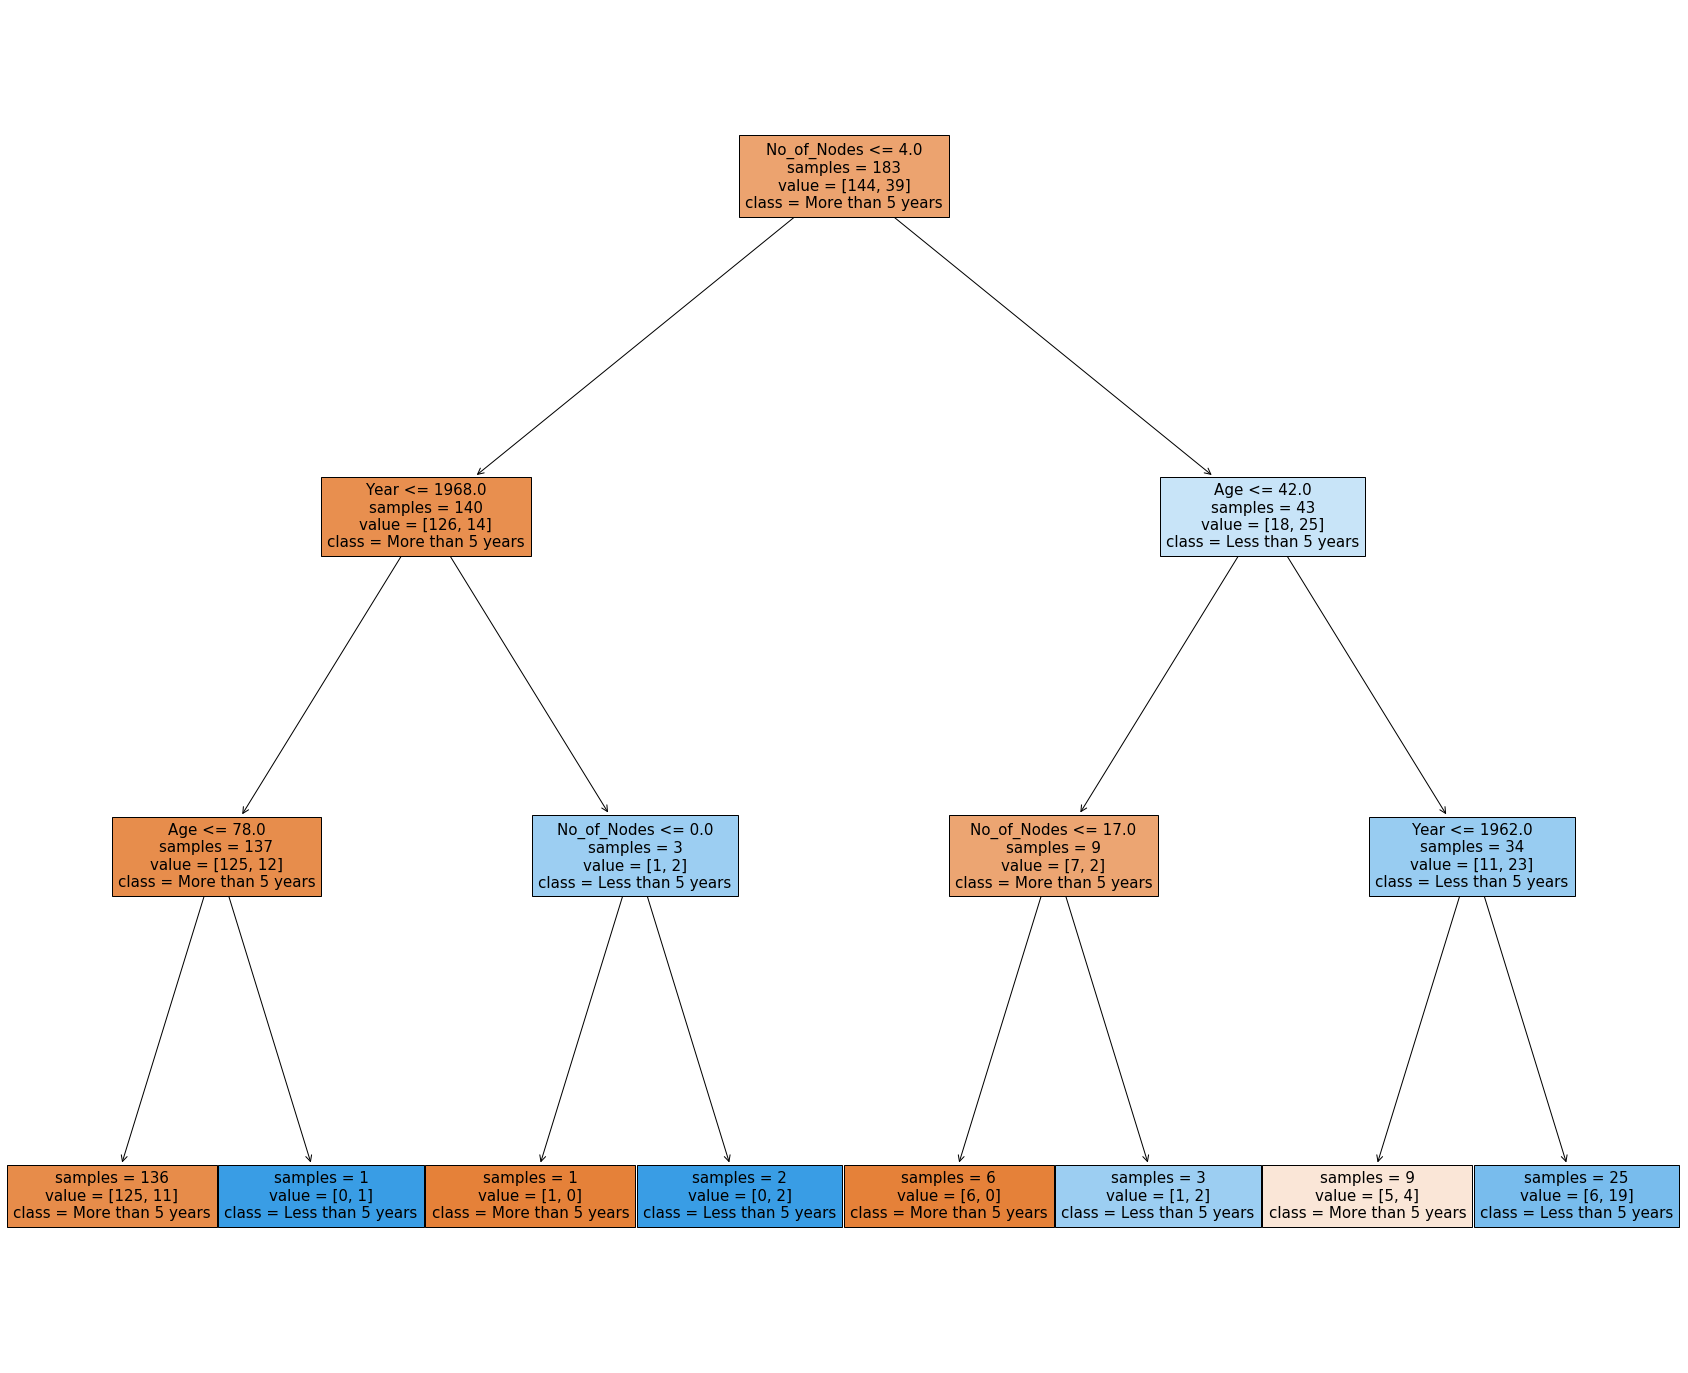

In [223]:
# Setting target names
target_names = ["More than 5 years","Less than 5 years"]



fig = plt.figure(figsize=(30,25))
_= sklearn.tree.plot_tree(clf, precision=0, impurity=False,
                   feature_names=df_features_names, 
                   class_names=target_names,
                   filled=True)

#### Saving it into a png. file

In [224]:
fig.savefig("decistion_tree_60%.png")

#### Checking for error rate against max_depth

Text(0, 0.5, 'Error Rate')

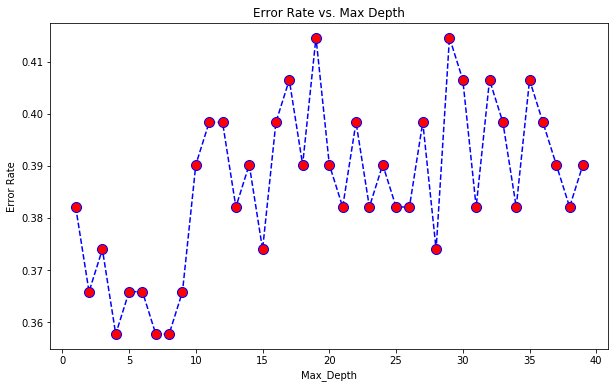

In [225]:
# Checking max_dept between 1 and 40

error_rate = []

for i in range(1,40):
    
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train,y_train)
    pred_i = tree_clf .predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    # Visualising error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Max Depth')
plt.xlabel('Max_Depth')
plt.ylabel('Error Rate')

##### The error and max_depth line chart above shows that a max_depth of 4 has the lowest error rate

#### Comparing performance

In [226]:
# Using max_depth of 
clf6 = DecisionTreeClassifier(max_depth=4)

# Training model using fit
model = clf6.fit(X_train, y_train)

# Predict value
y_pre6= model.predict(X_test)
print(f"the size of y_pre6 is: {y_pre6.shape}")



the size of y_pre6 is: (123,)


#### Confusion Matrix

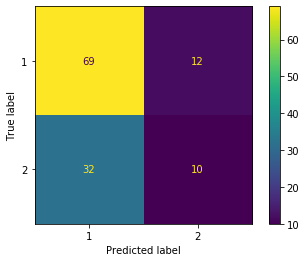

the confusion matrix is :
[[69 12]
 [32 10]]


In [227]:
plot_confusion_matrix(clf6, X_test, y_test)  
plt.show()  

cm = confusion_matrix(y_test, y_pre6)
print(f"the confusion matrix is :\n\
{cm}")

#### Classification report

In [228]:
print("Classification Report: Decision Tree Model (max_depth = 4")
print(classification_report(y_test, y_pre6))
print("Compare with max_depth = 3")
print ("Classification Report:")
print (classification_report(y_test, y_pre))


Classification Report: Decision Tree Model (max_depth = 4
              precision    recall  f1-score   support

           1       0.68      0.85      0.76        81
           2       0.45      0.24      0.31        42

    accuracy                           0.64       123
   macro avg       0.57      0.54      0.54       123
weighted avg       0.61      0.64      0.61       123

Compare with max_depth = 3
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.85      0.75        81
           2       0.40      0.19      0.26        42

    accuracy                           0.63       123
   macro avg       0.53      0.52      0.50       123
weighted avg       0.58      0.63      0.58       123



#### Result: Shows that max_depth of 4 shows reflects a higher accuracy than max_depth of 3; accuracy = 0.64, weighted avg f-score = 0.61.

#### Visualise

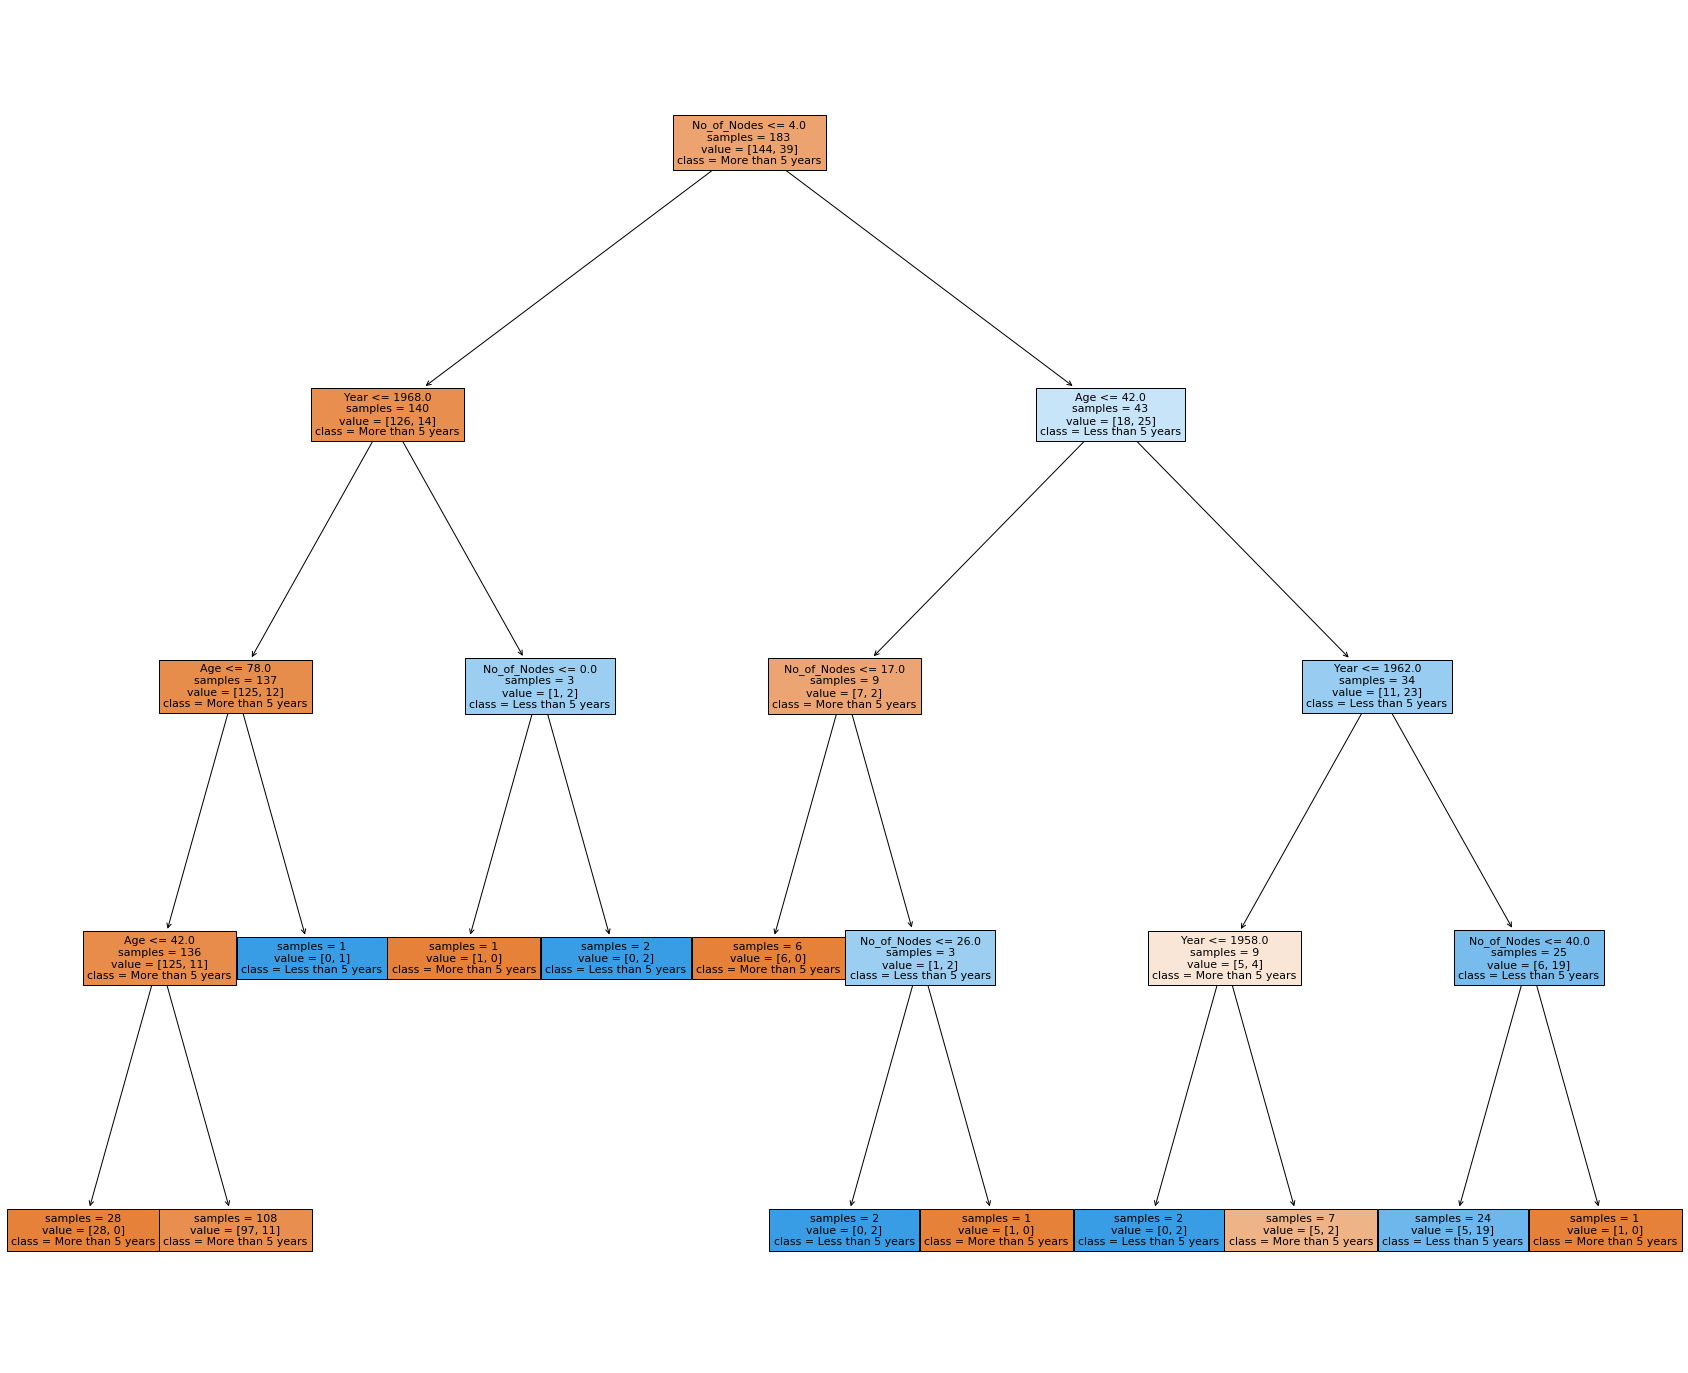

In [229]:
# Setting target names
target_names = ["More than 5 years","Less than 5 years"]



fig = plt.figure(figsize=(30,25))
_= sklearn.tree.plot_tree(clf6, precision=0, impurity=False,
                   feature_names=df_features_names, 
                   class_names=target_names,
                   filled=True)

#### Save tree to png file

In [230]:
fig.savefig("decistion_tree_60%_2.png")

### ii) 80% split

#### Spliting train and test set

In [231]:

X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

#Check sizes

print(f'Training dataset size:{X_train.shape[0]}')
print(f'Testing dataset size:{X_test.shape[0]}')

Training dataset size:244
Testing dataset size:62


#### Select decision tree classifier

In [232]:
# Starting with common practice of depth of 3
clf = DecisionTreeClassifier(max_depth=3)

#### Data Modelling

In [233]:
# Training model using fit
model = clf.fit(X_train, y_train)

# Predict value
y_pre= model.predict(X_test)
print(f"the size of y_pre is: {y_pre.shape}")


the size of y_pre is: (62,)


#### Confusion Matrix

In [234]:
cm = confusion_matrix(y_test, y_pre)
print(f"the confusion matrix is :\n\
{cm}")

the confusion matrix is :
[[34  3]
 [17  8]]


#### Classification report

In [235]:
print("Classification Report: Decision Tree Model")
print(classification_report(y_test, y_pre))


Classification Report: Decision Tree Model
              precision    recall  f1-score   support

           1       0.67      0.92      0.77        37
           2       0.73      0.32      0.44        25

    accuracy                           0.68        62
   macro avg       0.70      0.62      0.61        62
weighted avg       0.69      0.68      0.64        62



#### Visualise

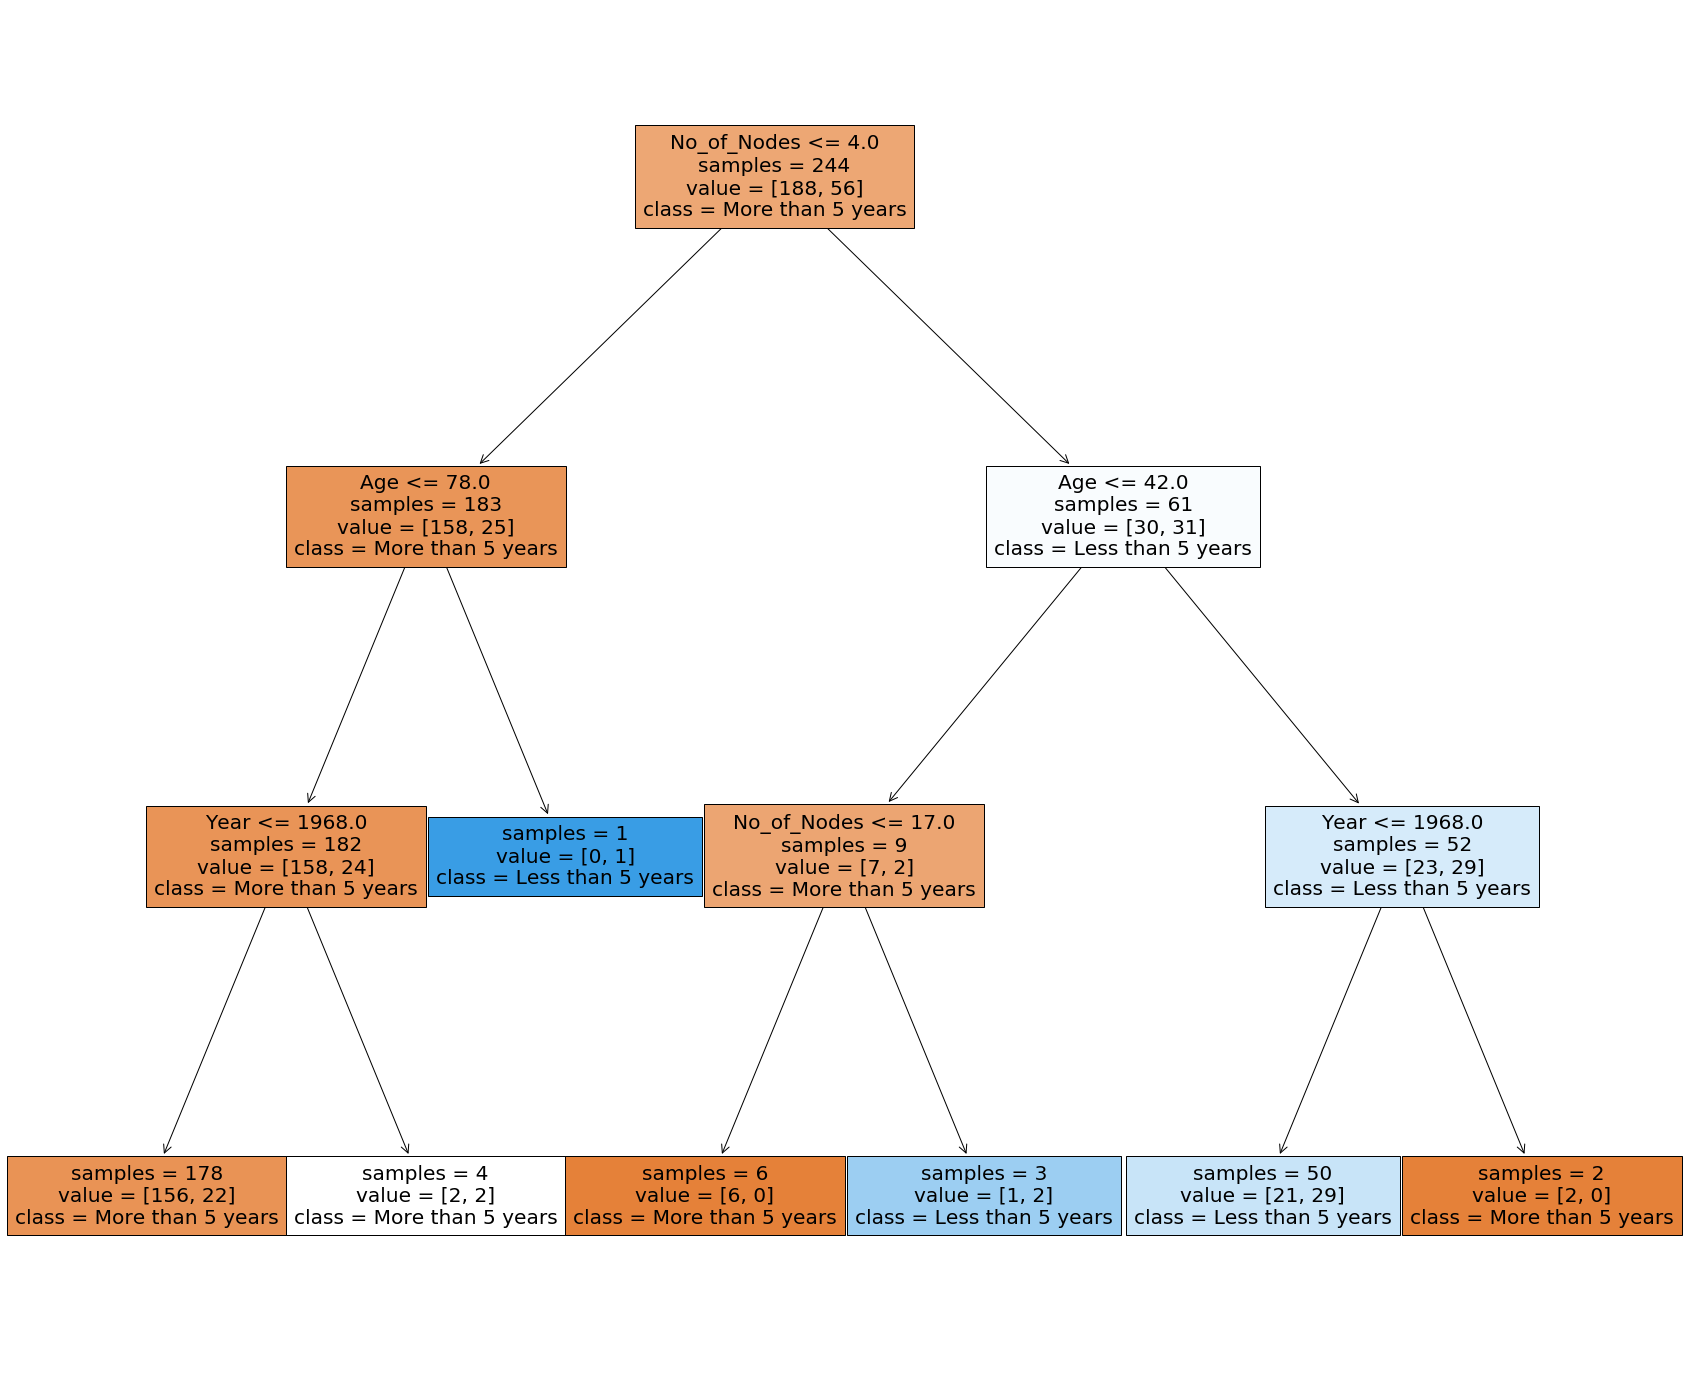

In [236]:

# Setting target names
target_names = ["More than 5 years","Less than 5 years"]



fig = plt.figure(figsize=(30,25))
_= sklearn.tree.plot_tree(clf, precision=0,impurity=False,
                   feature_names=df_features_names, 
                   class_names=target_names,
                   filled=True)

#### Saving it into a png. file

In [237]:

fig.savefig("decistion_tree_80%.png")

#### Checking for error rate against max_depth

Text(0, 0.5, 'Error Rate')

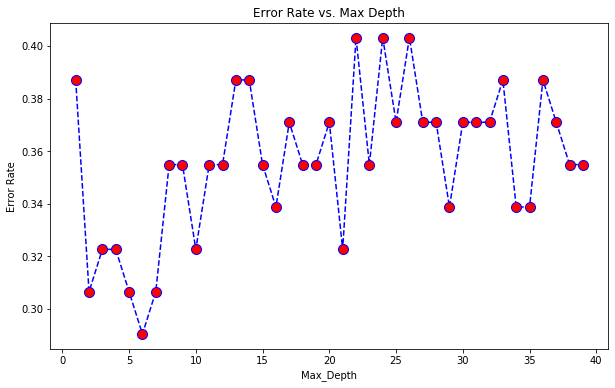

In [238]:
# Checking max_dept between 1 and 40

error_rate = []

for i in range(1,40):
    
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train,y_train)
    pred_i = tree_clf .predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    # Visualising error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Max Depth')
plt.xlabel('Max_Depth')
plt.ylabel('Error Rate')

#### The error line chart above shows that, max_depth of 7 produces the lowest error rate.

#### Comparing performance

In [239]:
# Using max_depth of 7
clf7 = DecisionTreeClassifier(max_depth=7)

# Training model using fit
model = clf7.fit(X_train, y_train)

# Predict value
y_pre7= model.predict(X_test)
print(f"the size of y_pre7 is: {y_pre7.shape}")



the size of y_pre7 is: (62,)


#### Confusion matrix

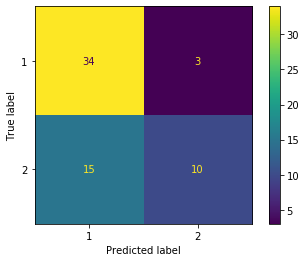

the confusion matrix is :
[[34  3]
 [15 10]]


In [240]:
plot_confusion_matrix(clf7, X_test, y_test)  
plt.show()  

cm = confusion_matrix(y_test, y_pre7)
print(f"the confusion matrix is :\n\
{cm}")

#### Classification report

In [241]:
print("Classification Report: Decision Tree Model (max_depth = 7")
print(classification_report(y_test, y_pre7))
print("Compare with max_depth = 3")
print ("Classification Report:")
print (classification_report(y_test, y_pre))


Classification Report: Decision Tree Model (max_depth = 7
              precision    recall  f1-score   support

           1       0.69      0.92      0.79        37
           2       0.77      0.40      0.53        25

    accuracy                           0.71        62
   macro avg       0.73      0.66      0.66        62
weighted avg       0.72      0.71      0.68        62

Compare with max_depth = 3
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.92      0.77        37
           2       0.73      0.32      0.44        25

    accuracy                           0.68        62
   macro avg       0.70      0.62      0.61        62
weighted avg       0.69      0.68      0.64        62



#### Result: Shows that max_depth of 7  reflects a higher accuracy than max_depth of 3; accuracy = 0.69 and weighted avg f-score = 0.68.

#### Visualisation

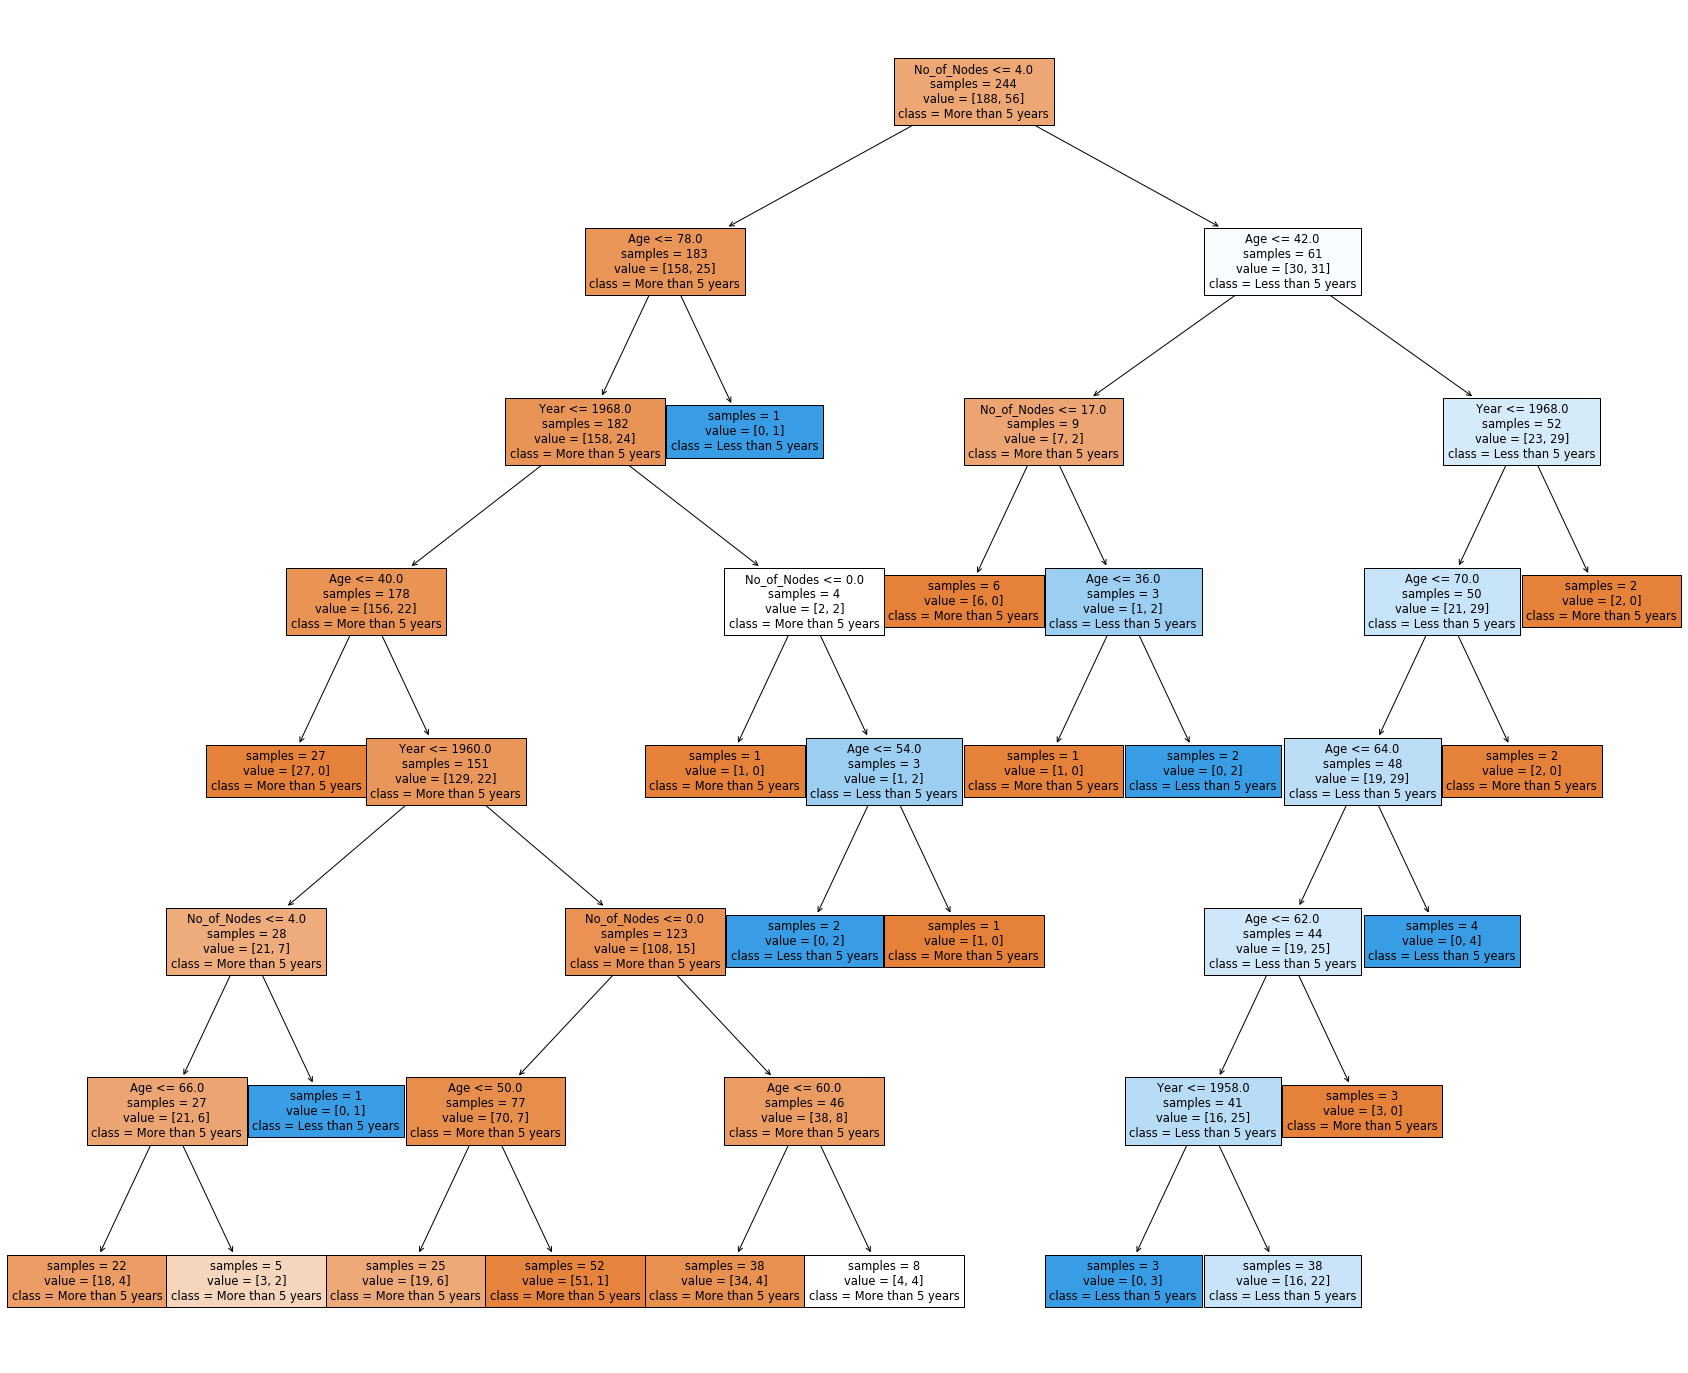

In [242]:
# Setting target names
target_names = ["More than 5 years","Less than 5 years"]



fig = plt.figure(figsize=(30,25))
_= sklearn.tree.plot_tree(clf7, precision=0, impurity=False,
                   feature_names=df_features_names, 
                   class_names=target_names,
                   filled=True)

#### Save tree to png file

In [243]:
fig.savefig("decistion_tree_80%_2.png")

#### Summary

#### 50% split shows that max_depth of 1 produces accuracy = 0.67; weighted avg. f-score = 0.66
#### 60% split Shows that max_depth of 4 produces accuracy = 0.64; weighted avg. f-score = 0.61
#### 80% split Shows that max_depth of 7 produces accuracy = 0.71; weighted avg. f-score = 0.68


#### Although both max_depth of 1 and 7 produces the same f1-score results, but the model with max_depth=7 has a higher accurary. Moreover, have just 1 max_depth will be grossly underfitting, hence the appropriate max_depth for the model is 7. 

### Comparison between KNN model and Decision Tree model

- The best performing KNN model is the one with k-value of 22 that achieves 0.70 accuracy score and 0.64 weigthed avg f1-score
- The best performing Decision Tree model is one with max_depth of 7 which produces 0.69 accuracy score, and 0.68 weighted avg f1-score.

There are 2 factors that make a model reliable - its ability to predict with high accuracy and the ability to generalise unseen data. Judging by the results shown here, the KNN model appears to outperforms on accuracy while the Decision Tree model has a higher f1-score but overall the best of both models scored similarly against their test sets.

So which model should we use? To answer this, we need to return to the original task of this project, that is to help doctors filter critical patients i.e. patients that may not survive greater than 5 years (Status 2). Therefore, it is appropriate to choose a model that favours labelling patients with Status 2, than one that favours precision and risk excluding them.

The KNN model showed a good overall accuracy and tended to label patients correctly but it leaves out slightly more patients than the DTL model, resulting  in more false negatives. The DTL model, on the other hand, scored higher in F1-score, suggesting a more balanced performance in precision and sensitivity. More importantly, the DTL model is more sensitive in labelling patients as “Status 2” than the KNN model. Despite it resulting in more false positives, this supposedly less than ideal outcome may actually be more useful in this instance, as it is better to mislabel patients 1 as 2 than to mislabel a patient who may die within 5 years as not. For this reason, the DTL Model is the better model.


This conclusion is reached based on the available information as mentioned here, the model can be improved if more information are available such as medical history, diet and hospital facilities are being factored in.
